# Example: k-Nearest Neighbors

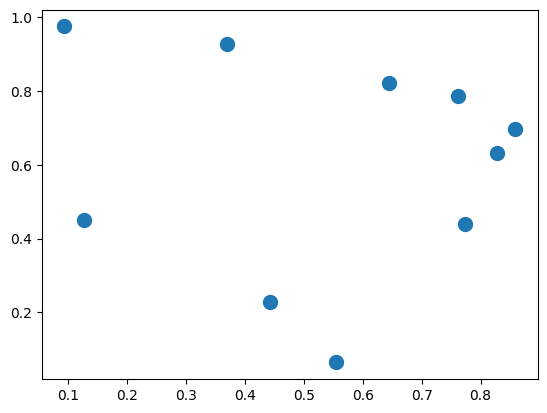

In [1]:
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng(seed=42)

X = rng.random(size=(10, 2))
plt.scatter(X[:,0], X[:,1], s=100)
plt.show()

In [2]:
dist_sq = np.sum((X[:, np.newaxis] - X[np.newaxis, :] ** 2), axis=-1)

In [3]:
differences = X[:, np.newaxis] - X[np.newaxis, :]
differences.shape

(10, 10, 2)

In [4]:
sq_differences = differences ** 2
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

In [5]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [6]:
nearest = np.argsort(dist_sq, axis=1)
nearest

array([[0, 9, 1, 3, 7, 6, 8, 5, 4, 2],
       [1, 9, 3, 6, 0, 5, 7, 8, 4, 2],
       [2, 5, 4, 6, 3, 9, 1, 7, 0, 8],
       [3, 6, 1, 9, 0, 5, 7, 2, 4, 8],
       [4, 7, 2, 5, 8, 6, 0, 3, 9, 1],
       [5, 2, 6, 3, 4, 1, 9, 0, 7, 8],
       [6, 3, 1, 9, 5, 0, 2, 7, 4, 8],
       [7, 8, 4, 0, 9, 1, 6, 3, 5, 2],
       [8, 7, 0, 4, 9, 1, 3, 6, 5, 2],
       [9, 1, 3, 0, 6, 5, 7, 8, 4, 2]], dtype=int64)

In [7]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

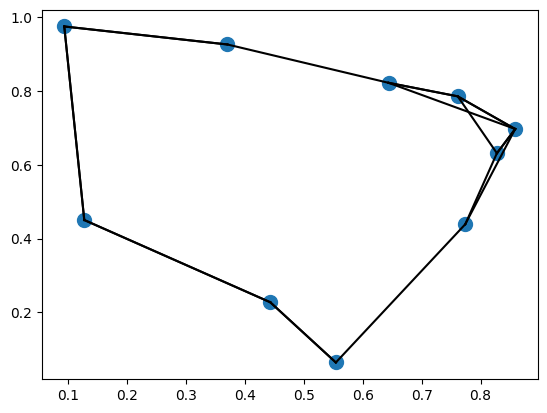

In [8]:
K =   2
plt.scatter(X[:, 0], X[:, 1], s=100)
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        plt.plot(*zip(X[j], X[i]), color='black')
plt.show()